In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.python.client import device_lib;print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9057954493916666135
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9204972913
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8051722928852556357
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [10]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72862 sha256=b8c1e74f63a0976b3082ca6597d888a025caba7ef1362c7ac03ce733e167aa3d
  Stored in directory: c:\users\elbum\appdata\local\pip\cache\wheels\aa\e7\e7\eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5494 sha256=dd8d40e190a466e69f55ba954f16679e93263bf6e554b02707482374938d3709
  Stored in directory: c:\users\elbum\appdata\local\pip\cache\wheels\7c\26\30\5f3d95da00fe94d0c4a5ec5b4ffd2e1ae18545f5fa61752e52
Successfully built kaggle python-slugify
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.8
    Uninstalling urllib3-1.25.8:
      Successfully uninstalled urllib3-1.25.8


In [2]:
import json

In [3]:
with open('kaggle.json') as f:
    kaggle = json.load(f)

In [4]:
import os

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle['username']
os.environ['KAGGLE_KEY'] = kaggle['key']

In [ ]:
!kaggle competitions download -c dog-breed-identification

In [10]:
import pandas as pd
label_text = pd.read_csv('dog-breed-identification/labels.csv')
print(label_text.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [11]:
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [13]:
label_text['breed'].nunique()

120

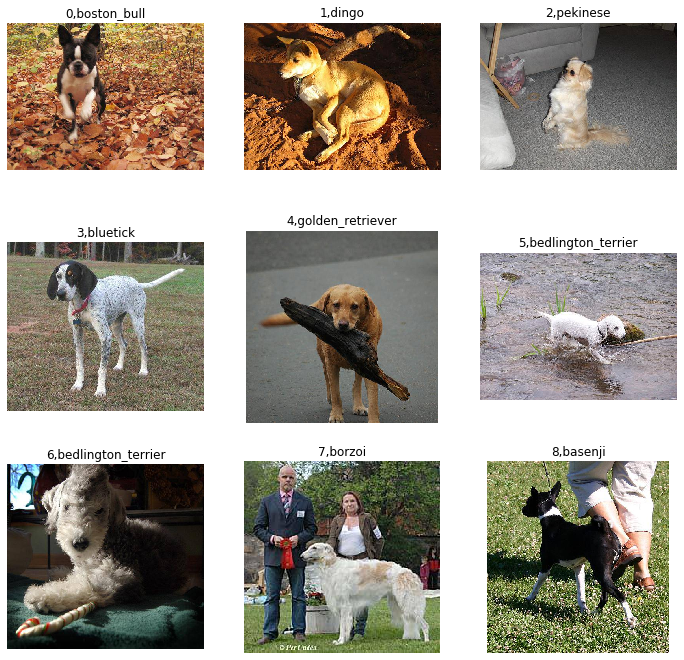

In [18]:
import PIL.Image as Image
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for c in range(9):
    image_id = label_text.loc[c,'id']
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread("./dog-breed-identification/train/"+image_id+'.jpg'))
    plt.title(str(c) + ',' + label_text.loc[c,'breed'])
    plt.axis('off')
plt.show()
    

In [21]:
import numpy as np

In [19]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

14540800/14536120 [==============================] - 6s 0us/step


In [22]:
for layer in mobilev2.layers[:-1]:
    layer.trainable = True

for layer in mobilev2.layers[:-1]:
    if 'kernel' in layer.__dict__:
        kernel_shape = np.array(layer.get_weights()).shape
        layer.set_weights(tf.random.normal(kernel_shape,0,1))
        

In [23]:
import cv2

In [24]:
train_X = []
for i in range(len(label_text)):
    img = cv2.imread('./dog-breed-identification/train/'+label_text['id'][i]+'.jpg')
    img = cv2.resize(img,dsize=(224,224))
    img = img/255.
    train_X.append(img)
train_X=np.array(train_X)
print(train_X.shape)
print(train_X.size*train_X.itemsize,'bytes')

(10222, 224, 224, 3)
12309577728 bytes


In [25]:
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]

In [26]:
unique_Y

['boston_bull',
 'dingo',
 'pekinese',
 'bluetick',
 'golden_retriever',
 'bedlington_terrier',
 'borzoi',
 'basenji',
 'scottish_deerhound',
 'shetland_sheepdog',
 'walker_hound',
 'maltese_dog',
 'norfolk_terrier',
 'african_hunting_dog',
 'wire-haired_fox_terrier',
 'redbone',
 'lakeland_terrier',
 'boxer',
 'doberman',
 'otterhound',
 'standard_schnauzer',
 'irish_water_spaniel',
 'black-and-tan_coonhound',
 'cairn',
 'affenpinscher',
 'labrador_retriever',
 'ibizan_hound',
 'english_setter',
 'weimaraner',
 'giant_schnauzer',
 'groenendael',
 'dhole',
 'toy_poodle',
 'border_terrier',
 'tibetan_terrier',
 'norwegian_elkhound',
 'shih-tzu',
 'irish_terrier',
 'kuvasz',
 'german_shepherd',
 'greater_swiss_mountain_dog',
 'basset',
 'australian_terrier',
 'schipperke',
 'rhodesian_ridgeback',
 'irish_setter',
 'appenzeller',
 'bloodhound',
 'samoyed',
 'miniature_schnauzer',
 'brittany_spaniel',
 'kelpie',
 'papillon',
 'border_collie',
 'entlebucher',
 'collie',
 'malamute',
 'welsh

In [27]:
train_Y

[0,
 1,
 2,
 3,
 4,
 5,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 3,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 19,
 5,
 1,
 4,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 10,
 28,
 29,
 4,
 0,
 30,
 16,
 21,
 31,
 1,
 24,
 32,
 33,
 16,
 34,
 35,
 13,
 21,
 10,
 21,
 14,
 29,
 24,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 39,
 47,
 48,
 49,
 50,
 27,
 51,
 52,
 53,
 50,
 46,
 8,
 54,
 55,
 56,
 57,
 58,
 33,
 59,
 28,
 54,
 37,
 11,
 47,
 60,
 20,
 61,
 27,
 14,
 60,
 16,
 17,
 44,
 62,
 63,
 14,
 27,
 64,
 29,
 65,
 37,
 44,
 59,
 64,
 66,
 1,
 45,
 63,
 50,
 66,
 67,
 3,
 37,
 37,
 54,
 57,
 49,
 68,
 49,
 4,
 44,
 69,
 2,
 70,
 71,
 31,
 72,
 16,
 53,
 45,
 73,
 10,
 30,
 36,
 33,
 69,
 23,
 45,
 74,
 75,
 76,
 64,
 6,
 76,
 10,
 77,
 5,
 78,
 20,
 23,
 19,
 30,
 32,
 8,
 79,
 56,
 11,
 67,
 40,
 73,
 6,
 80,
 81,
 82,
 24,
 83,
 48,
 68,
 10,
 35,
 66,
 55,
 27,
 84,
 85,
 13,
 86,
 22,
 72,
 85,
 87,
 88,
 89,
 52,
 18,
 26,
 24,
 47,
 57,
 33,
 89,
 61,
 40,
 7,
 89,
 47,
 72,
 90

In [28]:
train_Y = np.array(train_Y)

In [29]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120,activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [30]:
history = model.fit(train_X,train_Y,epochs=50,validation_split=0.25,batch_size=32)

Train on 7666 samples, validate on 2556 samples
Epoch 1/50
7666/7666 [==============================] - 51s 7ms/sample - loss: 4.9049 - accuracy: 0.0106 - val_loss: 9.1790 - val_accuracy: 0.0082
Epoch 2/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 4.8585 - accuracy: 0.0095 - val_loss: 8.1435 - val_accuracy: 0.0063
Epoch 3/50
7666/7666 [==============================] - 39s 5ms/sample - loss: 4.8332 - accuracy: 0.0124 - val_loss: 8.3365 - val_accuracy: 0.0047
Epoch 4/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 4.8103 - accuracy: 0.0147 - val_loss: 7.6555 - val_accuracy: 0.0067
Epoch 5/50
7666/7666 [==============================] - 41s 5ms/sample - loss: 4.7880 - accuracy: 0.0175 - val_loss: 7.7649 - val_accuracy: 0.0086
Epoch 6/50
7666/7666 [==============================] - 40s 5ms/sample - loss: 4.7828 - accuracy: 0.0177 - val_loss: 7.2082 - val_accuracy: 0.0078
Epoch 7/50
7666/7666 [==============================] - 40s 5ms/sample

KeyboardInterrupt: 

In [31]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

In [32]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120,activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)


for layer in mobilev2.layers[:-20]:
    layer.trainable = False
    

for layer in mobilev2.layers[-20:]:
    layer.trainable = True
    
# for layer in mobilev2.layers[:-1]:
#     if 'kernel' in layer.__dict__:
#         kernel_shape = np.array(layer.get_weights()).shape
#         layer.set_weights(tf.random.normal(kernel_shape,0,1))

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [33]:
history = model.fit(train_X,train_Y,epochs=10,validation_split=0.25,batch_size=32)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 19s 2ms/sample - loss: 3.4607 - accuracy: 0.2538 - val_loss: 2.2632 - val_accuracy: 0.3995
Epoch 2/10
7666/7666 [==============================] - 14s 2ms/sample - loss: 1.7778 - accuracy: 0.5738 - val_loss: 1.8315 - val_accuracy: 0.4765
Epoch 3/10
7666/7666 [==============================] - 14s 2ms/sample - loss: 1.3077 - accuracy: 0.6741 - val_loss: 1.7538 - val_accuracy: 0.4973
Epoch 4/10
7666/7666 [==============================] - 17s 2ms/sample - loss: 1.0556 - accuracy: 0.7447 - val_loss: 1.6914 - val_accuracy: 0.5176
Epoch 5/10
7666/7666 [==============================] - 15s 2ms/sample - loss: 0.8705 - accuracy: 0.7962 - val_loss: 1.6852 - val_accuracy: 0.5211
Epoch 6/10
7666/7666 [==============================] - 17s 2ms/sample - loss: 0.7414 - accuracy: 0.8330 - val_loss: 1.6755 - val_accuracy: 0.5309
Epoch 7/10
7666/7666 [==============================] - 14s 2ms/sample

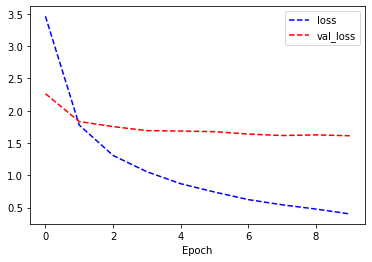

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

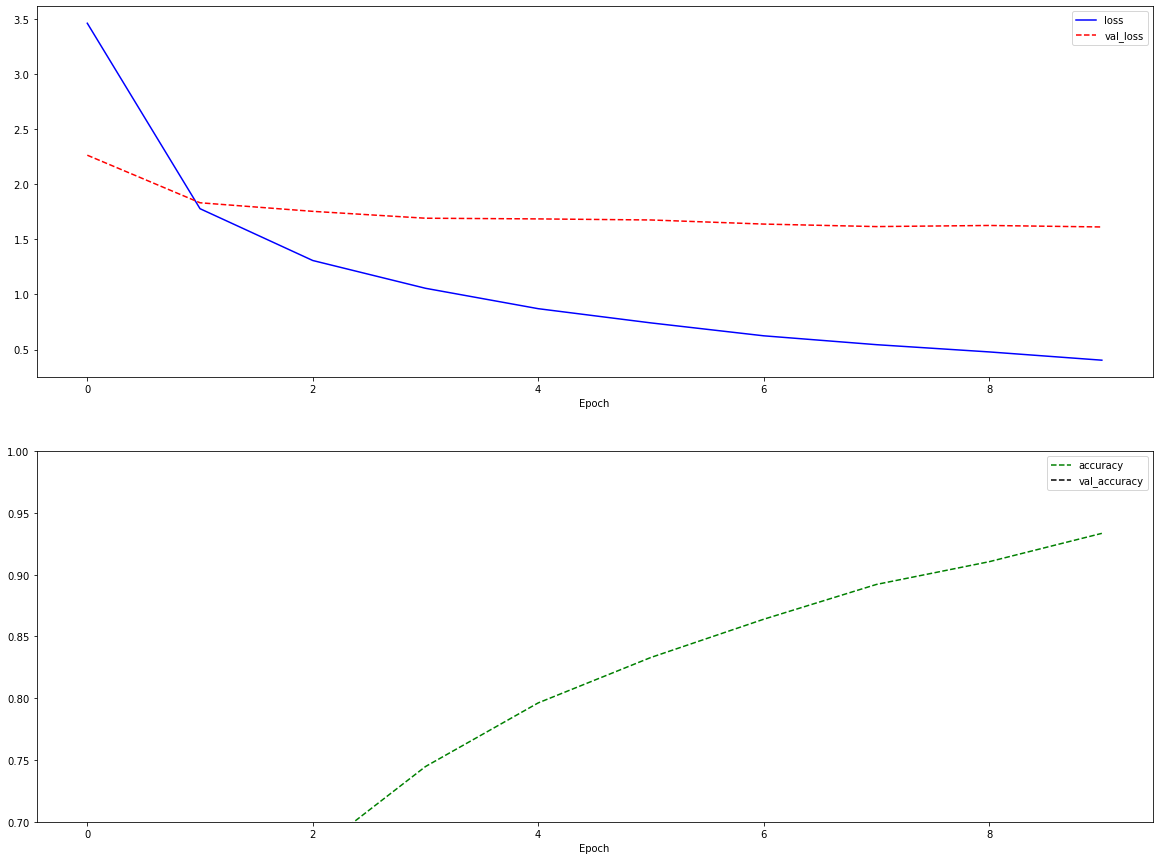

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'g--',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()